In [1]:
import numpy as np
import pandas as pd

In [2]:
# loading dataset
url="https://raw.githubusercontent.com/AREEG94FAHAD/TaskComplexityEval-24/refs/heads/main/problems_data.jsonl"
try:
    df = pd.read_json(url, lines=True)
except:
    print('Encountered an error while downloading dataset')


In [3]:
df.sample(5)

,title,description,input_description,output_description,sample_io,problem_class,problem_score,url
361,Negative Graph,"It’s exam week. Once again, Victor spent so mu...",The input begins with one line containing the ...,"Output a single integer $C$, the shortest poss...","[{'input': '3 3 1 0 1 0 1 2 2 1 -2 0 2 3', 'ou...",hard,8.1,https://open.kattis.com/problems/negativegraph
1118,Distinctive Character,The similarity between two characters $A$ and ...,The first line of input contains two integers ...,Output a single line describing the features o...,"[{'input': '3 5 01001 11100 10111', 'output': ...",hard,6.7,https://open.kattis.com/problems/distinctivech...
1325,Greedy Increasing Subsequences,Jimmy’s homework is to find a long increasing ...,The first line of input contains a single inte...,The first line of output contains the number $...,"[{'input': '7 2 2 1 5 3 4 6', 'output': '3 2 5...",hard,6.3,https://open.kattis.com/problems/greedyincreas...
1148,Straza,Near a military base there is a system of tren...,The first line contains the integer $N$ $(1\n ...,Output the number of ways the guards can be pl...,[{'input': '6 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 ...,hard,6.7,https://open.kattis.com/problems/straza
3269,Architecture,Your brother has won an award at the recent Br...,The first line consists of two integers $1 \le...,Output one line containing the string possible...,"[{'input': '4 4 4 3 2 1 1 2 3 4', 'output': 'p...",medium,2.9,https://open.kattis.com/problems/architecture


In [4]:
df.shape

(4112, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4112 entries, 0 to 4111
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               4112 non-null   object 
 1   description         4112 non-null   object 
 2   input_description   4112 non-null   object 
 3   output_description  4112 non-null   object 
 4   sample_io           4112 non-null   object 
 5   problem_class       4112 non-null   object 
 6   problem_score       4112 non-null   float64
 7   url                 4112 non-null   object 
dtypes: float64(1), object(7)
memory usage: 257.1+ KB


In [6]:
#Actual NULL values
print("input description -",(df["input_description"].str.strip() == "").sum())
print("output description -",(df["output_description"].str.strip() == "").sum())
print("description -",(df["description"].str.strip() == "").sum())
print("title -",(df["title"].str.strip() == "").sum())

input description - 120
output description - 131
description - 81
title - 0


In [7]:
#duplicates
df[df.duplicated(subset=["title", "url"], keep=False)]

,title,description,input_description,output_description,sample_io,problem_class,problem_score,url
1233,Advanced Causal Measurements,Causality is a very important concept in theor...,The first line of input is the number of cases...,Output consists of a single line for each case...,[{'input': '4 4 1 1 -1 1 3 1 4 2 6 4 2 1 -1 1 ...,hard,6.5,https://open.kattis.com/problems/causal
4111,Advanced Causal Measurements,Causality is a very important concept in theor...,The first line of input is the number of cases...,Output consists of a single line for each case...,[{'input': '4 4 1 1 -1 1 3 1 4 2 6 4 2 1 -1 1 ...,hard,6.5,https://open.kattis.com/problems/causal


In [8]:
# drop duplicates
print(df.shape)
df = df.drop_duplicates(subset=["title","url"])
print(df.shape)

(4112, 8)
(4111, 8)


In [9]:
df.describe()

,problem_score
count,4111.000000
mean,5.114352
std,2.177928
min,1.100000
25%,3.300000
50%,5.200000
75%,6.900000
max,9.700000


In [10]:
df["problem_class"].value_counts()

problem_class
hard      1940
medium    1405
easy       766
Name: count, dtype: int64

In [11]:
df["problem_class"].value_counts()/len(df['problem_class'])

problem_class
hard      0.471905
medium    0.341766
easy      0.186329
Name: count, dtype: float64

----

### Note
1. dropped duplicate rows (1)
2. imbalanced `problem_class`
3. some empty strings in input desc, output desc, description. They will be handled in preprocessing


-------

# EDA

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

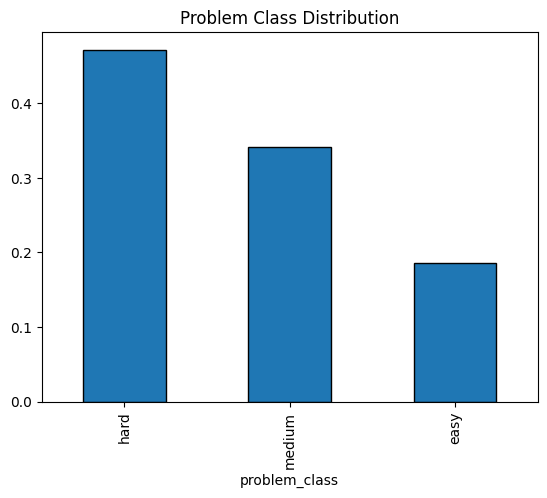

In [13]:
(df["problem_class"].value_counts()/len(df['problem_class'])).plot(kind="bar",edgecolor="black")
# df["problem_class"].value_counts().plot(kind="bar")
plt.title("Problem Class Distribution")
plt.show()

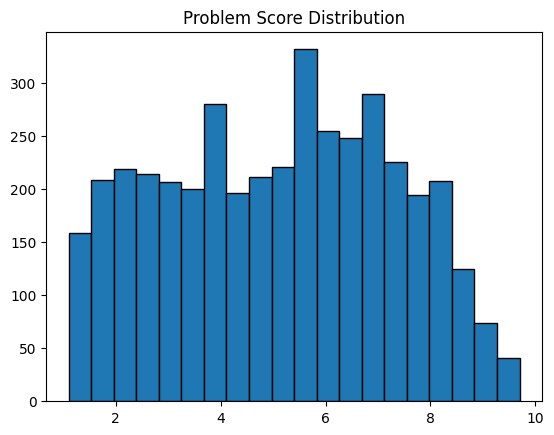

In [14]:
plt.hist(df["problem_score"], bins=20, edgecolor="black")
plt.title("Problem Score Distribution")
plt.show()

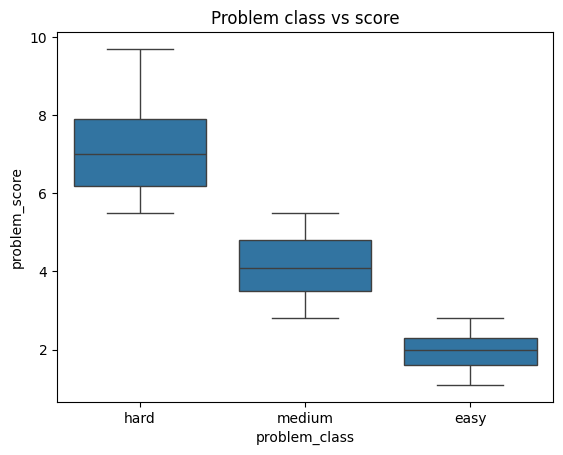

In [15]:
sns.boxplot(data=df, x='problem_class', y='problem_score')
plt.title("Problem class vs score")
plt.show()

In [16]:
df["text"] = (
    df["title"].str.lower().str.strip()+ " " + df["description"].str.lower().str.strip()+ " " +
    df["input_description"].str.lower().str.strip()+ " "+ df["output_description"].str.lower().str.strip())

df["text_len"]=df["text"].str.len()
df["text_len"].describe()


count    4111.000000
mean     1623.911700
std       756.666678
min        10.000000
25%      1113.000000
50%      1514.000000
75%      2000.000000
max      7580.000000
Name: text_len, dtype: float64

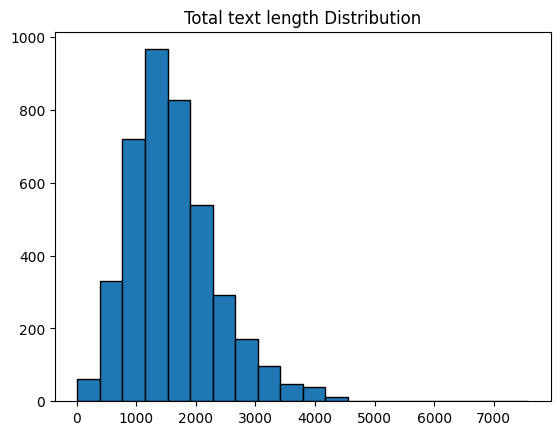

In [17]:
plt.hist(df["text_len"], bins=20, edgecolor="black")
plt.title("Total text length Distribution")
plt.show()

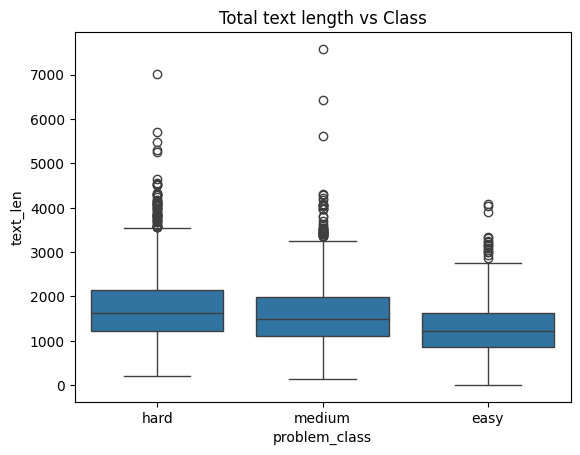

In [18]:
sns.boxplot(data=df, x="problem_class", y="text_len")
plt.title("Total text length vs Class")
plt.show()

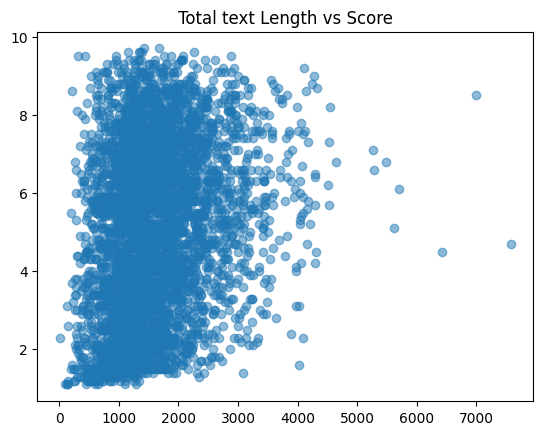

In [19]:
plt.scatter(df["text_len"], df["problem_score"], alpha=0.5)
plt.title("Total text Length vs Score")
plt.show()

In [20]:
df["sym_cnt"] = df["text"].str.count(r"[0-9+\-*/=.$%()^|&]")/df["text_len"]
df["sym_cnt"].describe()

count    4111.000000
mean        0.042528
std         0.022089
min         0.000000
25%         0.027160
50%         0.037861
75%         0.052538
max         0.245675
Name: sym_cnt, dtype: float64

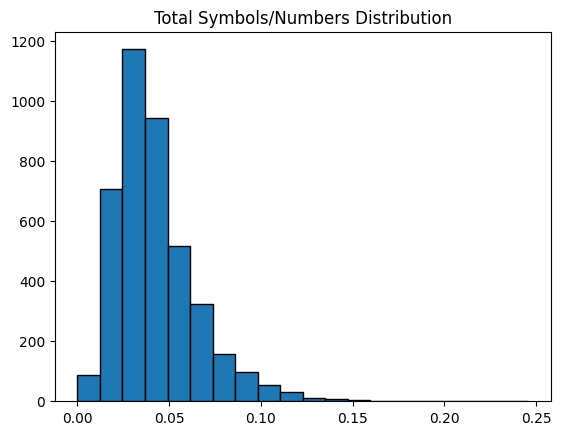

In [21]:
plt.hist(df["sym_cnt"], bins=20, edgecolor="black")
plt.title("Total Symbols/Numbers Distribution")
plt.show()

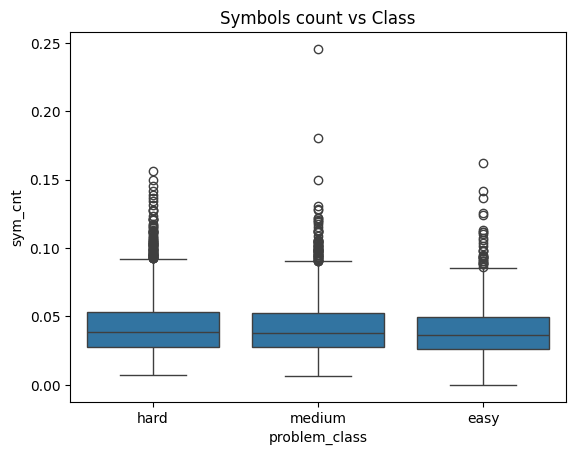

In [22]:
sns.boxplot(data=df, x="problem_class", y="sym_cnt")
plt.title("Symbols count vs Class")
plt.show()

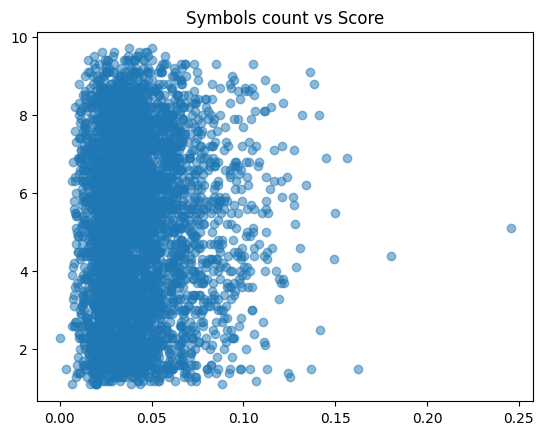

In [23]:
plt.scatter(df["sym_cnt"], df["problem_score"], alpha=0.5)
plt.title("Symbols count vs Score")
plt.show()


In [24]:
keywords=["array","recursion","binary search","tree","graph","dp","stack","queue","greedy",
            "matrix","set","map","heap","hash","sort"]
for k in keywords:
    df[k]=df["text"].str.contains(k, na=False)
df[keywords] = df[keywords].astype(int)
df[keywords+["problem_class"]].sample(5)

,array,recursion,binary search,tree,graph,dp,stack,queue,greedy,matrix,set,map,heap,hash,sort,problem_class
3373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,easy
2192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,medium
2600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,medium
2047,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,medium
2040,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,medium


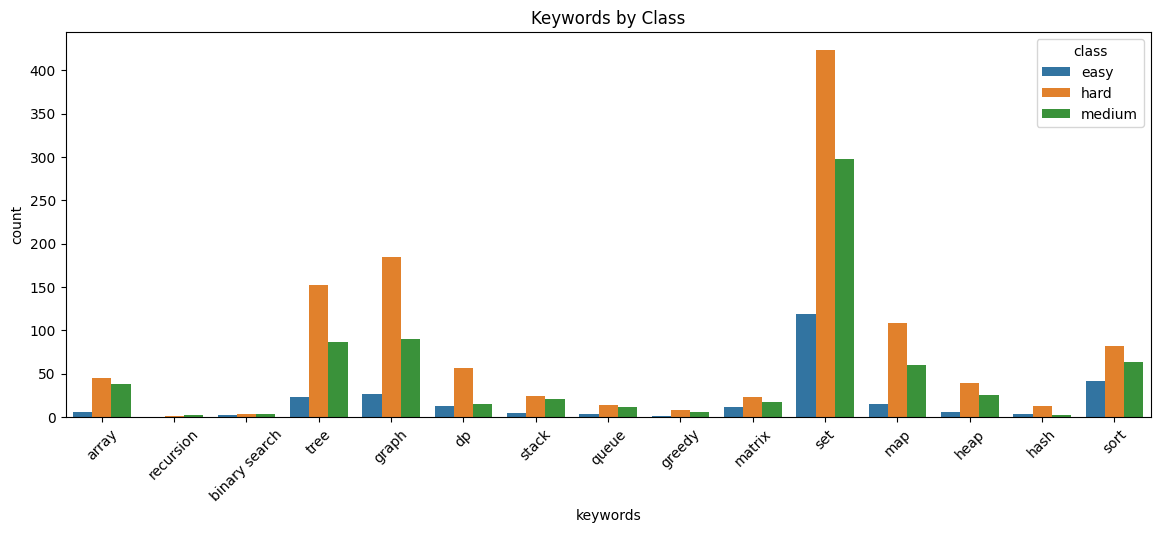

In [25]:
t=[]
for k in keywords:
    counts=df.groupby("problem_class")[k].sum()
    for cls in counts.index:
        t.append([k,cls,counts[cls]])
df1=pd.DataFrame(t,columns=["keywords","class","count"])

plt.figure(figsize=(14, 5))
plt.xticks(rotation=45)
sns.barplot(data=df1, x="keywords", y="count", hue="class")
plt.title("Keywords by Class")
plt.show()


In [26]:
no_keywords=df[keywords].sum(axis=1)==0
print("Rows with no keywords:", no_keywords.sum())
print("%:",f"{no_keywords.mean():.1%}")
print("By class:")
print(df[no_keywords]["problem_class"].value_counts(normalize=True))


Rows with no keywords: 2412
%: 58.7%
By class:
problem_class
hard      0.439055
medium    0.339138
easy      0.221808
Name: proportion, dtype: float64


In [27]:
df['word_cnt'] = df['text'].str.split().str.len()
df['word_cnt'].describe()

count    4111.000000
mean      273.041352
std       125.220126
min         1.000000
25%       188.000000
50%       255.000000
75%       336.000000
max      1226.000000
Name: word_cnt, dtype: float64

In [28]:
df['unique_words'] = df['text'].str.split().apply(lambda x: len(set(x)))
df['unique_words'].describe()

count    4111.000000
mean      143.362442
std        51.788123
min         1.000000
25%       108.000000
50%       138.000000
75%       173.000000
max       418.000000
Name: unique_words, dtype: float64

----

# CLASSIFICATION

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [30]:
cols = keywords+['text_len', 'sym_cnt', 'word_cnt', 'unique_words']
X = df[cols]
le = LabelEncoder()
y = le.fit_transform(df['problem_class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
import pickle
pickle.dump(le, open('label_encoder.pkl', 'wb'))

In [32]:
print('trainig set -',X_train.shape)
print('test set -',X_test.shape)


trainig set - (3288, 19)
test set - (823, 19)


In [33]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy.sparse import hstack

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tf = tfidf.fit_transform(df.loc[X_train.index, 'text'].fillna(''))
X_test_tf = tfidf.transform(df.loc[X_test.index, 'text'].fillna(''))

X_train_f = hstack([X_train_tf, X_train[cols].values])
X_test_f = hstack([X_test_tf, X_test[cols].values])

In [34]:
pickle.dump(tfidf, open('tfidf_vectorizer.pkl', 'wb'))


rf: Accuracy = 0.524
              precision    recall  f1-score   support

        easy       0.51      0.37      0.43       153
        hard       0.54      0.79      0.65       389
      medium       0.46      0.23      0.31       281

    accuracy                           0.52       823
   macro avg       0.50      0.47      0.46       823
weighted avg       0.51      0.52      0.49       823



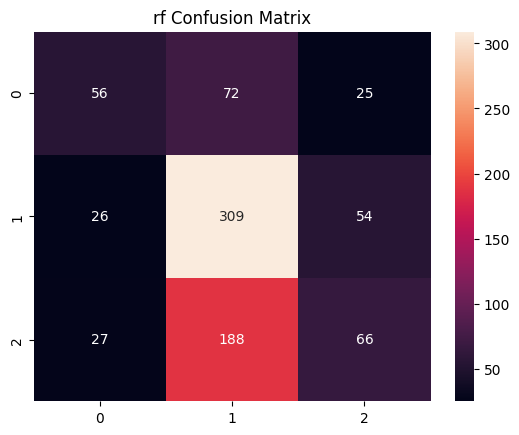

c:\Users\dell\Desktop\open project\acm- auto judge\rf_env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



lr: Accuracy = 0.470
              precision    recall  f1-score   support

        easy       0.40      0.58      0.48       153
        hard       0.58      0.51      0.54       389
      medium       0.38      0.36      0.37       281

    accuracy                           0.47       823
   macro avg       0.46      0.48      0.46       823
weighted avg       0.48      0.47      0.47       823



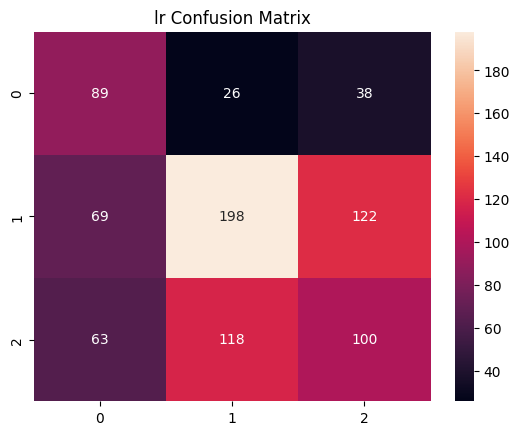


svm: Accuracy = 0.418
              precision    recall  f1-score   support

        easy       0.27      0.65      0.38       153
        hard       0.56      0.54      0.55       389
      medium       0.47      0.12      0.20       281

    accuracy                           0.42       823
   macro avg       0.43      0.44      0.37       823
weighted avg       0.48      0.42      0.40       823



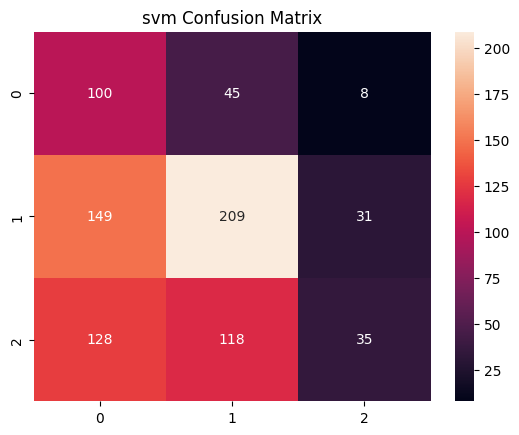

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
models = {
    'rf': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'lr': LogisticRegression(random_state=42, class_weight='balanced', max_iter=2000),
    'svm': SVC(random_state=42, class_weight='balanced')
}

for name, model in models.items():
    model.fit(X_train_f, y_train)
    y_pred = model.predict(X_test_f)
    acc = (y_pred == y_test).mean()
    print(f"\n{name}: Accuracy = {acc:.3f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(f'{name} Confusion Matrix')
    plt.show()


In [36]:
import pickle
with open('classification_model.pkl', 'wb') as f:
    pickle.dump(models['rf'], f)


------

# REGRESSION

In [37]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df['problem_class_enc'] = le.transform(df['problem_class'])
X_train_f = hstack([X_train_tf, X_train[cols].values, np.array(df.loc[X_train.index,'problem_class_enc']).reshape(-1,1)])
X_test_f = hstack([X_test_tf, X_test[cols].values, np.array(df.loc[X_test.index,'problem_class_enc']).reshape(-1,1)])

y_train_score = df.loc[X_train.index, 'problem_score'].values
y_test_score = df.loc[X_test.index, 'problem_score'].values


In [38]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Gradient Boosting": GradientBoostingRegressor(
        random_state=42
    )
}

results = []

for name in regressors:
    model = regressors[name]
    model.fit(X_train_f, y_train_score)

    y_pred = model.predict(X_test_f)

    mae = mean_absolute_error(y_test_score, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_score, y_pred))
    r2 = r2_score(y_test_score, y_pred)

    results.append([name, mae, rmse, r2])

    print(name)
    print("MAE :", round(mae, 3))
    print("RMSE:", round(rmse, 3))
    print("R2  :", round(r2, 3))
    print()

results_df = pd.DataFrame(
    results,
    columns=["Model", "MAE", "RMSE", "R2"]
)

print("Model Comparison:")
print(results_df)


Linear Regression
MAE : 2.298
RMSE: 2.854
R2  : -0.68

Ridge Regression
MAE : 1.773
RMSE: 2.116
R2  : 0.077

Gradient Boosting
MAE : 0.744
RMSE: 0.921
R2  : 0.825

Model Comparison:
               Model       MAE      RMSE        R2
0  Linear Regression  2.298462  2.854069 -0.679718
1   Ridge Regression  1.773196  2.115859  0.076832
2  Gradient Boosting  0.743778  0.920731  0.825187


In [40]:
with open('regression_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


----